# Gaussian formula

光の量子状態は"ガウス状態"と"非ガウス状態"分けることができます。
その内"ガウス状態"のみで記述される状態同士の計算は、より簡単に定式化することができます。

- Gaussian Wigner function[[1]](https://arxiv.org/abs/quant-ph/0410100)

$W(\xi) = \frac{1}{(2\pi)^{N} \sqrt{\det V^{(N)}}} \exp{\left( -\frac{1}{2}(\xi-\mu) [V^{(N)}]^{-1} (\xi-\mu)^{T} \right)}$

見ての通り、古典的なガウス分布とよく似ています。

$\xi = [q_{1}, p_{1}, q_{2}, p_{2}, \dots, q_{N}, p_{N}]$には$N$個のqumodeの直交位相が埋め込まれています。  
$\mu$は$\xi$の平均に対応します。  
$V^{(N)}$は$2N \times 2N$の共分散行列です。


古典的なガウス分布分布がそうであるように、Gaussian Wigner functionも1次と2次のモーメント(平均と共分散)でパラメタライズされます。

- first moment  
$\bar{\boldsymbol{\xi}} = \langle \hat{\boldsymbol{\xi}} \rangle= \mathrm{Tr}[\hat{\boldsymbol{\xi}} \hat{\rho}]$

- second moment  
$V_{ij} = \frac{1}{2}\langle \{\Delta\hat{\xi}_i, \Delta\hat{\xi}_j \}\rangle$  
$\{ A, B \} = AB+BA$

Gaussian formulaにおけるゲート演算は、この平均や共分散行列を使って演算します。

### Gaussian formulaの計算効率について

Gaussian formulaは現実にユニバーサルな量子計算を行うために必要な非線形ゲートを持ちません。  

実際、Gaussian formulaではqumode数Nの計算に$2N\times 2N$行列を用います。  
qumode数に対し計算リソースが多項式的にしか増えないため、古典計算で効率的にシミュレートできます。

よってGaussian formulaで扱えるゲートのみでは、いわゆる"古典コンピュータで効率的に実行できない計算"を効率的に実行することはできません。

In [1]:
import photonqat as pq
import numpy as np

## 基本的なゲート操作

### Desplacement gate

$(q, p)$位相平面上で状態を$(Re(\alpha), Im(\alpha))$だけ平行移動させます。

$$
\begin{bmatrix}
q \\
p
\end{bmatrix}
\to 
\begin{bmatrix}
q+Re(\sqrt{2}\alpha) \\
p+Im(\sqrt{2}\alpha)
\end{bmatrix}
$$

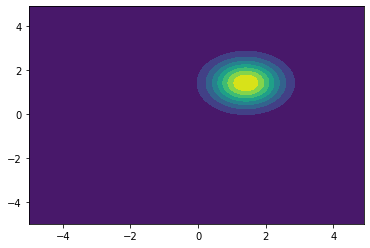

In [2]:
alpha = (1 + 1j) # parameter

G = pq.Gaussian(1)
G.D(0, alpha) # Dgate

G.run()

(x, p, W) = G.Wigner(0, plot = 'y', xrange = 5.0, prange = 5.0) # plot Wigner function

### Squeezing gate 


$(q, p)$位相平面上で状態を狭窄化(squeeze)します。  
パラメータ$r$はsqueezeの強さを指します($r>0:q$方向, $r<0:p$方向)。  
ある方向にsqueezeされ分布が狭くなると、それと直交する方向は逆に分布が広がります。

$$
S=\begin{bmatrix}
e^{-r} & 0 \\
0 & e^{r}
\end{bmatrix}
$$

$$
V \to SVS^{T} \\
\mu \to S\mu
$$

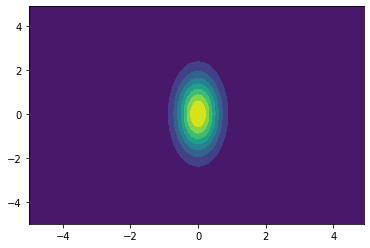

In [3]:
r = .5

G = pq.Gaussian(1)
G.S(0, r) # Sgate

G.run()

(x, p, W) = G.Wigner(0, plot = 'y', xrange = 5.0, prange = 5.0) # plot Wigner function

### Beam splitter



ビームスプリッタという素子で2つのモードにある光を混ぜ合わせます。  
ビームスプリッタとは入ってきた光の$R$%を反射し、$T$%を透過する($R + T=100$)素子で、一定量の光を透過する鏡のようなものです。  
以下の$V, \mu$は2qumodeからなるそれぞれ$4\times4$行列、$4$要素ベクトルです。

$$
S=\begin{bmatrix}
\cos{\theta} & 0 & \sin{\theta} & 0\\
0 & \cos{\theta} & 0 & \sin{\theta} \\
-\sin{\theta} & 0 & \cos{\theta} & 0 \\
0 & -\sin{\theta} & 0 & \cos{\theta}
\end{bmatrix}
$$


$$
V \to SVS^{T} \\
\mu \to S\mu
$$

Gaussian formulaでは光子数状態を直接扱えないため、HOM干渉計のような例をシミュレートすることはできません。  
代わりにD gateを使用してmode 0をDesplaceし、ビームスプリッタでmode 0とmode 1をかけ合わせた後にmode 1が変化しているか見てみます。

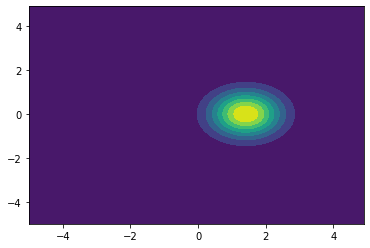

In [4]:
alpha = np.sqrt(2)
G = pq.Gaussian(2)
G.D(0, alpha) # mode 0をDesplace
G.BS(0, 1, -np.pi/4) # 50:50 ビームスプリッタ
G.run()

(x, p, W) = G.Wigner(1, plot = 'y', xrange = 5.0, prange = 5.0) # plot Wigner function for mode1

## 参考文献

[1] https://arxiv.org/abs/quant-ph/0410100